# Importe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Functions

In [61]:
def lin_reg(x,a,b):
  y = a*x+b
  return y

def k(a):
  return 9.81/a

def k1(m,T):
  return m*np.pi**2*4/T**2

- $\chi^2/dof > 1$: zu kleine Fehler
- $\chi^2/dof < 1$: zu große Fehler
- Gleichung: $$ \frac{\chi^2}{dof} =  \frac{1}{n-p}\sum_i^n \frac{(f(x_i)-y_i)^2}{u_{y_i}^2}$$
  - p: Anzahl der Fitparameter

In [37]:
def chi_sq(x,y,a,b,u_y): # für 2 Fitparameter
  """
  x: x values for the x axis
  y: y values for the y axis
  a: Steigung/gradient
  b: Achsenabschnitt, wenn/if a*x=0
  u_y: Unsicherheit/uncertainty from y
  """
  n = len(y)
  factor = 1/(n-2)
  fx = lin_reg(x,a,b)
  return factor * np.sum((fx-y)**2/u_y**2)


# Data

In [3]:
# help(pd.ExcelFile)

In [4]:
url = 'https://github.com/Ben-physics-dotcom/Internships/raw/main/GPR1/Data/F4-Federkonstante.xlsx'
data = pd.ExcelFile(url)
data.sheet_names

['Aufgabe-1', 'Aufgabe-2', 'Aufgabe-3']

In [5]:
df1 = pd.read_excel(data,'Aufgabe-1')
df2 = pd.read_excel(data,'Aufgabe-2')
df3 = pd.read_excel(data,'Aufgabe-3')

In [6]:
df3

,Unnamed: 0,Variablenname,Formelzeichen,Wert,Unsicherheit,Einheit
0,0,Torsionsmodel,G,8.100,0.700,10^10Pa
1,1,Drahtlänge,l,661.000,5.000,mm
2,2,Drahtdurchmesser,d,0.805,0.003,m
3,3,Wickelradius,r,10.500,0.200,m


# Aufgabe 1

Hinweis: Was passiert, wenn man bei der Regression statt die Einheit g die Einheit kg benutzt?

Gleichung: $$ x(m) = \frac{g}{k} \cdot m $$

In [7]:
df1

,Unnamed: 0,Masse [g],Auslenkung [cm],Masse 1 [g],Auslenkung 1 [cm],Massen n,Masse [g] Unsicherheit: 0.005g
0,0,0,19.65,400,11.15,1.0,49.995
1,1,50,18.50,350,12.30,2.0,50.261
2,2,100,17.35,300,13.35,3.0,50.656
3,3,150,16.40,250,14.45,4.0,50.418
4,4,200,15.30,200,15.50,5.0,49.970
5,5,250,14.25,150,16.65,6.0,49.930
6,6,300,13.15,100,17.45,7.0,50.210
7,7,350,12.05,50,18.75,8.0,50.824
8,8,400,11.10,0,19.80,NaN,NaN


In [8]:
# x-m-Diagramm erstellen
# k aus Steigung bestimmen
# k aus Dreiecksmethode bestimmen
um = 0.005
u_x = 0.05
u_m1 = um*np.array([0,1,2,3,4,5,6,7,8])
u_m2 = um*np.array([8,7,6,5,4,3,2,1,0])

In [9]:
x1 = np.array(df1['Auslenkung [cm]'])
x2 = np.array(df1['Auslenkung 1 [cm]'])
m1 = np.array(df1['Masse [g]'])
m2 = np.array(df1['Masse 1 [g]'])

Text(0, 0.5, 'Auslenkung [cm]')

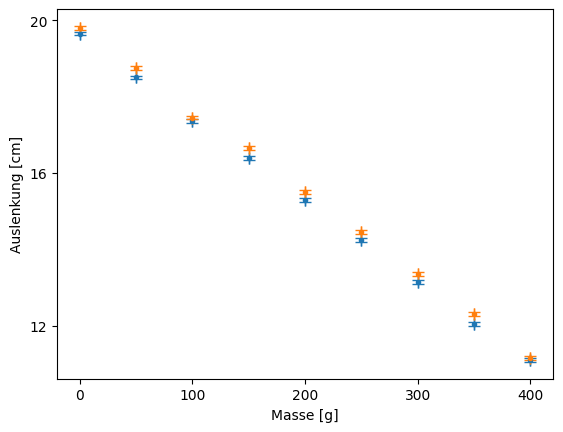

In [10]:
plt.errorbar(m1,x1,
             xerr=u_m1,
             yerr=u_x*np.ones(len(x1)),
             fmt='.',capsize=4,label='Messreihe 1')
plt.errorbar(m2,x2,
             xerr=u_m2,
             yerr=u_x*np.ones(len(x2)),
             fmt='.',capsize=4,label='Messreihe 2')
plt.xticks([0,100,200,300,400])
plt.yticks([12,16,20])
plt.xlabel('Masse [g]')
plt.ylabel('Auslenkung [cm]')

## Regression

In [27]:
X1 = sm.add_constant(m1)
model = sm.WLS(x1,X1,weights=0.05)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.173e+04
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.74e-13
Time:                        17:51:55   Log-Likelihood:                 14.281
No. Observations:                   9   AIC:                            -24.56
Df Residuals:                       7   BIC:                            -24.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5789      0.035    567.492      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
u_b1 = results.bse[0]
u_a1 = results.bse[1]
R1 = round(results.rsquared,5)
b1 = results.params[0]
a1 = results.params[1]

In [29]:
X2 = sm.add_constant(m2)
model2 = sm.WLS(x2,X2,weights=0.05)
results2 = model2.fit()
print(results2.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9958.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.67e-12
Time:                        17:51:55   Log-Likelihood:                 10.734
No. Observations:                   9   AIC:                            -17.47
Df Residuals:                       7   BIC:                            -17.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7789      0.051    386.545      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [30]:
u_b2 = results2.bse[0]
u_a2 = results2.bse[1]
R2 = round(results2.rsquared,5)
b2 = results2.params[0]
a2 = results2.params[1]

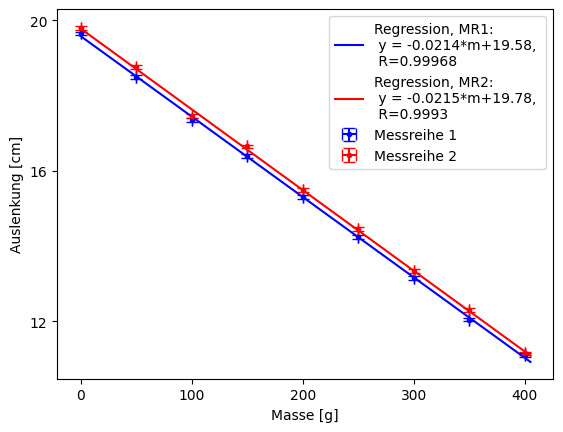

In [50]:
x_reg = np.linspace(-1,405,1000)
y1 = lin_reg(x_reg,a1,b1)
y2 = lin_reg(x_reg,a2,b2)
plt.errorbar(m1,x1,
             xerr=u_m1,
             yerr=u_x*np.ones(len(x1)),
             fmt='.',c='b',capsize=4,label='Messreihe 1')
plt.errorbar(m2,x2,
             xerr=u_m2,
             yerr=u_x*np.ones(len(x2)),c='r',
             fmt='.',capsize=4,label='Messreihe 2')
plt.plot(x_reg,y1,color='b',label=f'Regression, MR1: \n y = {round(a1,4)}*m+{round(b1,2)}, \n R={R1}')
plt.plot(x_reg,y2,color='r',label=f'Regression, MR2: \n y = {round(a2,4)}*m+{round(b2,2)}, \n R={R2}')
plt.xticks([0,100,200,300,400])
plt.yticks([12,16,20])
plt.legend()
plt.xlabel('Masse [g]')
plt.ylabel('Auslenkung [cm]')
plt.savefig('Regression-FK.png',dpi=600,transparent=True)

In [44]:
# chi^2
chi1 = round(chi_sq(m1,x1,a1,b1,0.05),2)
print(chi1)
chi2 = round(chi_sq(m2,x2,a2,b2,0.05),2)
print(chi2)

1.26
2.77


Berechnung der Federkonstanten aus der Steigung. Dreiecksmethode sollte bekannt sein.

$$ k=g/a = \frac{9.81m/s^2}{a}$$

In [47]:
k1 = round(k(a1),2)
print(k1)
k2 = round(k(a2),2)
print(k2)

-459.13
-457.34


**WICHTIG**: Nicht die Gaußsche Fehlerfortpflanzung vergessen.
$$ u = \sqrt{\sum_i^n (\partial_{x_i}f(x_i)⋅u_{x_i})^2} $$

# Aufgabe 2

In [51]:
df2

,Unnamed: 0,n,Schwingungen,T [s],Masse [g]
0,0,1,19,10.85,400
1,1,2,19,10.78,400
2,2,3,20,11.47,400
3,3,4,20,11.37,400
4,4,5,20,11.16,350
5,5,6,20,11.37,350
6,6,7,20,11.44,350
7,7,8,20,11.32,350
8,8,9,20,10.59,300
9,9,10,20,9.91,300


In [52]:
df2['T [s]'] = df2['T [s]']/df2['Schwingungen']
df2.head()

,Unnamed: 0,n,Schwingungen,T [s],Masse [g]
0,0,1,19,0.571053,400
1,1,2,19,0.567368,400
2,2,3,20,0.573500,400
3,3,4,20,0.568500,400
4,4,5,20,0.558000,350
5,5,6,20,0.568500,350
6,6,7,20,0.572000,350
7,7,8,20,0.566000,350
8,8,9,20,0.529500,300
9,9,10,20,0.495500,300


## Mittelwert/mean und Varianz/Variance

In [58]:
def var(x,mean):
  return 1/(len(x)-1)*np.sum((x-mean)**2)

In [59]:
t_df2 = np.array(df2['T [s]'])
print(t_df2[:4])
T = np.array([np.mean(t_df2[:4]), np.mean(t_df2[4:8]), np.mean(t_df2[8:11]),
              np.mean(t_df2[11:])])
var_T = np.array([
    var(t_df2[:4],T[0]), var(t_df2[4:8],T[1]), var(t_df2[8:11],T[2]), var(t_df2[11:],T[3])
])
print(T)
print(var_T)

[0.57105263 0.56736842 0.5735     0.5685    ]
[0.57010526 0.566125   0.51566667 0.49825   ]
[7.49630656e-06 3.53958333e-05 3.19083333e-04 6.12500000e-06]


In [64]:
m = np.array([400,350,300,250])/1000 # in kg

## Berechnung
$$ T= 2 \pi \sqrt{m/k} $$

In [65]:
k_T = k1(m,T)
print(k_T)

[48.58583011 43.1124907  44.53924732 39.75622416]
